# Computing the height of the intersection of the projective planar line with its twist by torsion points

### Roberto Gualdi and Martín Sombra

_Notebook run over SageMath 8.4_

### Abstract

This notebook provides the companion code for the paper "**Limit heights and special values of the Riemann Zeta function**", which is available at <https://www.markdownguide.org>.

More precisely, for a given integer $d$ and real number $\varepsilon>0$, the code computes the Weil height of the intersection between the line
$$C=Z(x_0+x_1+x_2)$$
and
$$\omega C=Z(x_0+\omega_1^{-1}x_1+\omega_2^{-1}x_2=0)$$
in the projective plane, as $\omega=(\omega_1,\omega_2)$ ranges in the set of $d$-torsion points of $(\overline{\mathbb{Q}}^\times)^2$.

The function `graphic_mean_average` computes

### The code

##### Initialization

In [1]:
RR = RealField(30)
CC = ComplexField(30)
i = CC(i)
pi = RR(pi)

import random #necessary to shuffle the array of height values

def F(d,a,b):
    return log( max( abs(exp(2*pi*i*a/d) - 1), abs(exp(2*pi*i*b/d) - 1), abs(exp(2*pi*i*b/d) - exp(2*pi*i*a/d)) ) )

def G(d,k):
    return log( abs(exp(2*pi*i*k/d)-1) ) 

def H(d,a,b):
    Phi= 0 
    S = 0
    e =  gcd([a,b,d])
    for k in [1..d-1]:
        if gcd(k,d) == 1:
            Phi = Phi +1
            S = S + F(d,k*a,k*b)-G(d,k*e)
    return S/Phi

def mean_height_coprime(d):
    if d == 1:
        return 0
    Jdn = 0
    U = 0
    Phi = 0
    V = 0
    for a in [0..d-1]:
        for b in [0..d-1]:
            if gcd([a,b,d]) == 1:
                Jdn = Jdn +1
                U = U + F(d,a,b)
    for k in [1..d-1]:
        if gcd(k,d) == 1:
            Phi = Phi +1
            V = V + G(d,k)
    return U/Jdn - V/Phi

def J(d):
    T = 0
    for a in [0..d-1]:
        for b in [0..d-1]:
            if gcd([a,b,d]) == 1:
                T = T + 1
    return T

def mean_height(d):
    return (1/(d^2-1))*sum( J(m)*mean_height_coprime(m) for m in divisors(d) )

def graphic_mean_average(d, epsilon):
    A = matrix(RR,d)
    v = vector(RR,d^2-1)
    j = 0
    for a in [1..d-1]:
        for b in [a+1..d-1]:
            if A[a,b] == 0:
                A[a,b] = H(d,a,b)
                e = gcd([a,b,d])
                for k in [1..d/e-1]:
                    if gcd(k,d/e) == 1:
                        A[Mod(k*a,d),Mod(k*b,d)] = A[a,b]
            A[b,a] = A[a,b]
            v[j] = A[a,b]
            v[d^2-2-j] = A[a,b]
            j = j+1
    random.shuffle(v)    #now A is the height values, well organized, while v is the set of their valued randomly shuffled
    print("d = ",d)
    print("maximum: ", max(v))
    print("average: ", sum(v)/(d^2-1))
    
    expectedaverage = n(2*zeta(3)/(3*zeta(2)))
    counter = 0
    for j in [0..d^2-2]:
        if abs(v[j]-expectedaverage)<epsilon:
            counter = counter+1
    print("For ", n(counter*100/(d^2-1)),"% of the points, the height is closer to the average than ", epsilon)
    
    l1 = line([(0.9,expectedaverage),(1.05,expectedaverage)], color='red', thickness=2)
    mahler = 0.32306595
    l2 = line([(0.9,mahler),(1.05,mahler)], color='orange', thickness=2) # horizontal line indicating mahler measure of 1+x+y
    w = [(j/(d^2-1), v[j]) for j in [0..d^2-2]]
    
    th2 = max(1,120/d)
    p = points(w,size=th2)
    g = p+l1+l2
    g.show(xmin=0, xmax=1.1, ymin=0, ymax=0.75, ticks=[[], None])
    
    sq = line([(-0.5,+0.5),(+0.5,+0.5),(+0.5,-0.5),(d-0.5,-0.5),(d-0.5,d-0.5),(-0.5,d-0.5),(-0.5,+0.5)], color='black', thickness=1, axes=False) 

    h=matrix_plot(A, origin='lower', frame=False, vmin=0, vmax=log(2),zorder=0)
    
    show(sq+h) #picture with white to black increasing

We do $x=y$

('d = ', 20)
('maximum: ', 0.69314718)
('average: ', 0.45140725)
('For ', 57.1428571428571, '% of the points, the height is closer to the average than ', 0.100000000000000)


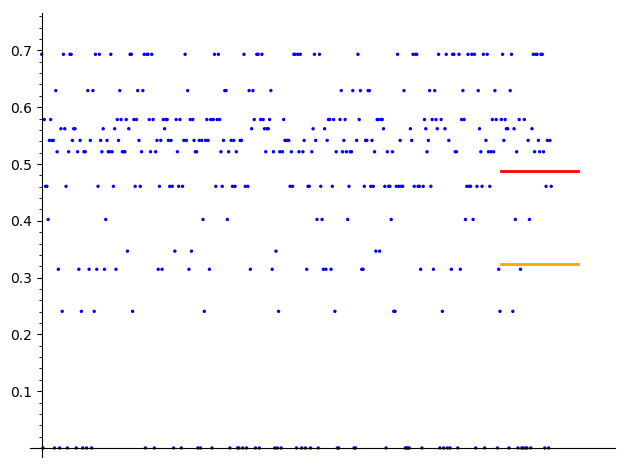

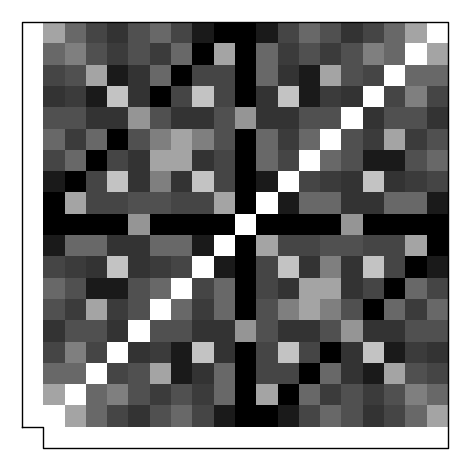

In [2]:
graphic_mean_average(20, 0.1)

In [3]:
def mean_average(d, epsilon):
    A = matrix(RR,d)
    v = vector(RR,d^2)
    j = 0
    for a in [1..d-1]:
        for b in [a+1..d-1]:
            if A[a,b] == 0:
                A[a,b] = H(d,a,b)
                e = gcd([a,b,d])
                for k in [1..d/e-1]:
                    if gcd(k,d/e) == 1:
                        A[Mod(k*a,d),Mod(k*b,d)] = A[a,b]
            A[b,a] = A[a,b]
            v[j] = A[a,b]
            v[d^2-1-j] = A[a,b]
            j = j+1
    random.shuffle(v)    #now A is the height values, well organized, while v is the set of their valued randomly shuffled
    average = sum(v)/d^2
    expectedaverage = n(2*zeta(3)/(3*zeta(2)))
    counter = 0
    for j in [0..d^2-1]:
        if abs(v[j]-expectedaverage)<epsilon:
            counter = counter+1
    percent = n(counter*100/d^2)
    l1 = line([(0.9,expectedaverage),(1.05,expectedaverage)], color='red', thickness=2)
    mahler = log(1.3813564445)
    l2 = line([(0.9,mahler),(1.05,mahler)], color='orange', thickness=2) # horizontal line indicating mahler measure of 1+x+y
    w = [(j/(d^2), v[j]) for j in range(d^2)]
    p = points(w)
    g = p+l1+l2
    return [average, percent]
    
def graphic_collection_average(d, epsilon): #graph the evolution of average and distance from epsilon for torsion sets till d
    v = vector(RR,d^2)
    j = 0
    a = 0
    average = []
    percent = []
    average_primes = []
    percent_primes = []
    for j in [1..d]:
        a = mean_average(j, epsilon)
        average.append([j,a[0]])
        percent.append([j,a[1]])
        j = j+1
    expectedaverage = n(2*zeta(3)/(3*zeta(2)))
    l = line([(0,expectedaverage),(d,expectedaverage)], color='red', thickness=2)
    for j in [1..d]:
        if j in Primes():
            average_primes.append(average[j-1])
            percent_primes.append(percent[j-1])
    p = points(average, color='cyan')+points(average_primes,color='darkblue')+l
    p.show(title='Evolution of averages')
    q = points(percent, color='lightskyblue')+points(percent_primes,color='darkblue')
    q.show(ymin=0, ymax=100, title='Evolution of percentages')

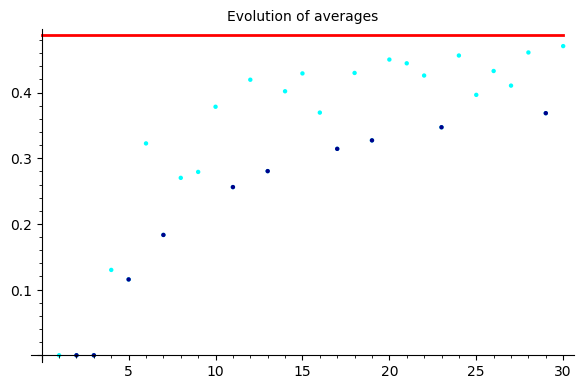

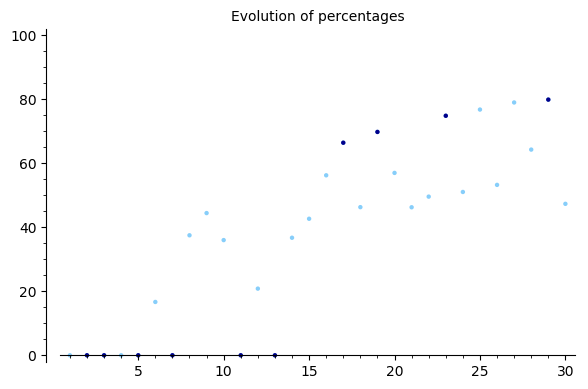

In [4]:
graphic_collection_average(30, 0.1)